<a href="https://colab.research.google.com/github/uyenvybuile1502/ANN_hw/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))


model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train_cat,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test, y_test_cat))


test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Accuracy: {test_acc*100:.2f}%")







x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7496 - loss: 0.7128 - val_accuracy: 0.8516 - val_loss: 0.4139
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8530 - loss: 0.4003 - val_accuracy: 0.8574 - val_loss: 0.3938
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8705 - loss: 0.3578 - val_accuracy: 0.8695 - val_loss: 0.3714
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8737 - loss: 0.3398 - val_accuracy: 0.8711 - val_loss: 0.3568
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8812 - loss: 0.3150 - val_accuracy: 0.8743 - val_loss: 0.3442
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8892 - loss: 0.3017 - val_accuracy: 0.8673 - val_loss: 0.3574
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8931 - loss: 0.2849 - val_accuracy: 0.8808 - val_loss: 0.3333
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8970 - loss: 0.2777 - val

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

model.save('fashion_mnist_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.7621 - loss: 0.6458 - val_accuracy: 0.8520 - val_loss: 0.4002
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8795 - loss: 0.3275 - val_accuracy: 0.8850 - val_loss: 0.3238
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.8989 - loss: 0.2747 - val_accuracy: 0.8947 - val_loss: 0.2924
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9138 - loss: 0.2347 - val_accuracy: 0.9035 - val_loss: 0.2712
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9221 - loss: 0.2103 - val_accuracy: 0.8999 - val_loss: 0.2729


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


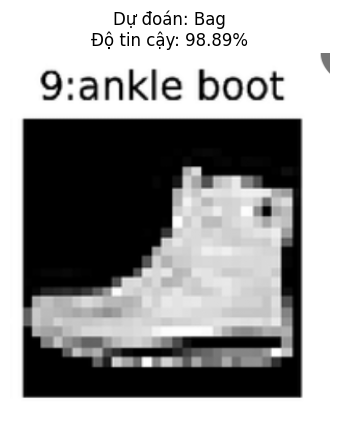

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model('fashion_mnist_model.h5')

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def preprocess_image(img_path):

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    return img

img_path = '/content/ankle boot.png'


processed_img = preprocess_image(img_path)


prediction = model.predict(processed_img)
predicted_class = np.argmax(prediction)
confidence = np.max(prediction) * 100


predicted_label = class_names[predicted_class]

original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(original_img, cmap='gray')
plt.title(f'Dự đoán: {predicted_label}\Độ tin cậy: {confidence:.2f}%')
plt.axis('off')
plt.show()





